In [1]:
import random
import pandas as pd
import sys
import re
import numpy as np
import matplotlib.pyplot as plt 
import numpy_indexed as npi
import statsmodels.api as sm
import pylab
from textblob import TextBlob 
import seaborn as sns
plt.style.use('seaborn')

C:\Users\Sourish\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
raw = pd.read_csv("D:/LIWC2015.csv")

In [3]:
filtered_samp = raw[(raw.useful>=1) & (raw.useful <= 30)]

print(raw.head())
raw.columns

                                                text  useful  cool  funny  \
0  This place was recommended to me by a number o...     2.0     0    0.0   
1  NEW MENU!!!\n\nFood: 4/5 Not too sweet\nServic...     3.0     0    0.0   
2  3.5 stars. Tracy Dessert 許留山 is small cozy Chi...     5.0     2    2.0   
3  I don't usually review based on one visit.  Bu...     1.0     0    0.0   
4  Love this place.\nI've been living in Henderso...     2.0     0    0.0   

                  date   WC  Analytic  Clout  Authentic   Tone  ...  Comma  \
0  2015-07-07 17:41:26  305     77.24  62.85      20.54  87.56  ...   0.00   
1  2018-09-23 20:16:40  136     69.09  35.64      28.81  99.00  ...   0.00   
2  2014-01-30 19:21:05  244     66.05  40.28      70.21  94.55  ...   4.51   
3  2010-11-18 15:34:37  148     44.26  31.82      74.76   4.83  ...   4.05   
4  2012-05-28 20:47:13   99     85.63  45.96      64.52  91.46  ...   9.09   

   Colon  SemiC  QMark  Exclam  Dash  Quote  Apostro  Parenth  Other

Index(['text', 'useful', 'cool', 'funny', 'date', 'WC', 'Analytic', 'Clout',
       'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun',
       'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep',
       'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare',
       'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx',
       'anger', 'sad', 'social', 'family', 'friend', 'female', 'male',
       'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ',
       'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual',
       'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk',
       'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion',
       'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death',
       'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler',
       'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam',
       'Dash', 'Quote

In [4]:
# Seperating the date you we can manipulate and split into sub-components
dates_list = []

# The new column variables we will soon add to our filtered data frame
month_list = []
year_list = []
day_list = []
time_list = []

for dates in filtered_samp["date"]:
    dates_list.append(dates)

for full_date in dates_list:
    month = float(full_date.split("-")[1])
    month_list.append(month)

    year = float(full_date.split("-")[0])
    year_list.append(year)
    
    # Looking at time need to do something similar to day
    date_with_time = full_date.split("-")[2]
    time = date_with_time.split(" ")[1]
    hour = time.split(":")[0]
    time_list.append(float(hour))
    
# Allows us to work with a filtered copy of the sample and make changes to it as now it is in a different state
df2 = filtered_samp.copy(deep=False)
df2["month"] = np.array(month_list)
df2["year"] = np.array(year_list)
df2["hour"] = np.array(time_list)

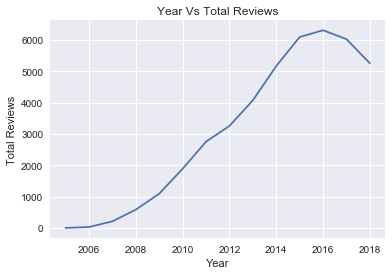

In [5]:
year_1 = df2["year"].unique()
year_1 = (list(year_1))
year_1.sort()

no_of_reviews = df2.groupby("year").count()


sns.lineplot(year_1, no_of_reviews["text"])
plt.title('Year Vs Total Reviews')
plt.xlabel('Year')
plt.ylabel('Total Reviews')
plt.savefig("Total Reviews per year.png")
plt.savefig("Reviews by year")
plt.show()






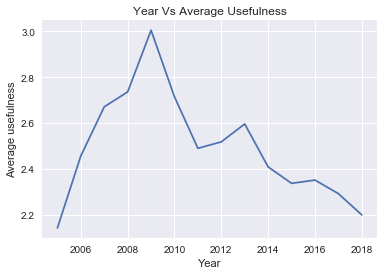

In [6]:
x_year, y_usefulness_avg = npi.group_by(df2.year).mean(df2.useful)

sns.lineplot(x_year, y_usefulness_avg)
plt.title('Year Vs Average Usefulness')
plt.xlabel('Year')
plt.ylabel('Average usefulness')
plt.savefig("Year.png")
plt.show()



# Explain the trend below: Since 2005/2006 was about the launch time of Yelp, these reviews would be less likely to accumulate reviews just due to a lack of users. After 2010(service boomed) the longer the time the review was posted, the more time it had to accumulate usefulness counts)
# Weight the reviews in each year diffrently?

In [7]:
#df3 = df2.copy(deep = True)
#df3["adjusted_usefulness"] = df2["useful"]
#pd.options.mode.chained_assignment = None  # default='warn'
#df3['adjusted_usefulness'] = np.array(df3['useful'])*np.array(df3.year == 2006) * 1.5

# Adding the Days as a column

In [8]:
days = []
for index in range(0,len(df2)):
    weekday = pd.Timestamp(df2.iloc[index,4]).weekday_name
    days.append(weekday)
    

C:\Users\Sourish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df2["Day"] = np.array(days)

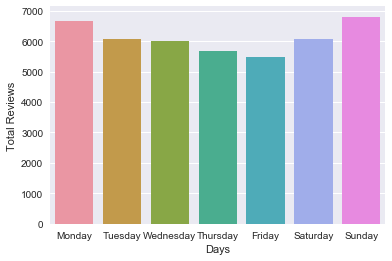

In [10]:
x = df2.groupby("Day").count()
days = x.index
no_reviews = list(x["text"])

x2 = pd.DataFrame()
x2['Days'] = days
x2["Total Reviews"] = no_reviews

ax = sns.barplot(x="Days", y="Total Reviews", data=x2, order=["Monday", "Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"])
plt.savefig("total_reviews_by_day")

(array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object),
 array([2.41543783, 2.46880168, 2.34075908, 2.33024691, 2.42068114,
        2.44834404, 2.48214882]))

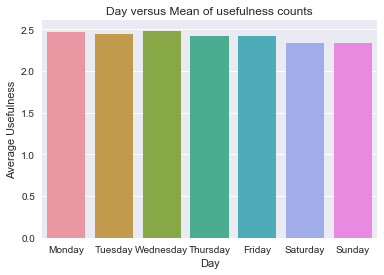

In [11]:
# Order the x-axis
x_day, y_usefulness_avg = npi.group_by(df2.Day).mean(df2.useful)
quick_df = pd.DataFrame()
quick_df["Day"] = x_day
quick_df["Average Usefulness"] = y_usefulness_avg

ax = sns.barplot(x="Day", y="Average Usefulness", data=quick_df, order=["Monday", "Tuesday","Wednesday","Thursday","Friday", "Saturday", "Sunday"])
plt.savefig("Day.png")
plt.title('Day versus Mean of usefulness counts')

x_day, y_usefulness_avg

In [12]:
day_end = []
for index in range(0, len(df2)):
    if (df2.iloc[index,-1] == "Monday") or (df2.iloc[index,-1] == "Tuesday") or (df2.iloc[index,-1] == "Wednesday") or (df2.iloc[index,-1] == "Thursday" or (df2.iloc[index,-1] == "Friday")):
        day_end.append("weekday")
    else:
        day_end.append("weekend")

In [13]:
df2["weekday_end"] = np.array(day_end)

x = df2.groupby("weekday_end").count()
x = x.iloc[:,0:1]
avg_total_day = float(x.iloc[0,0])/4 
avg_total_end = float(x.iloc[1,0])/3 

x.iloc[0,0] = avg_total_day
x.iloc[1,0] = avg_total_end

x.head()


,text
weekday_end,
weekday,7468.5
weekend,4288.0


Text(0.5, 1, 'Weekday VS Weekend Average Usefulness')

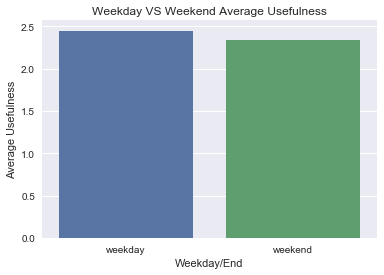

In [14]:
x_day, y_usefulness_avg = npi.group_by(df2.weekday_end).mean(df2.useful)
quick_df = pd.DataFrame()
quick_df["Weekday/End"] = x_day
quick_df["Average Usefulness"] = y_usefulness_avg

ax = sns.barplot(x="Weekday/End", y="Average Usefulness", data=quick_df)
plt.savefig("weekday or end")

plt.title('Weekday VS Weekend Average Usefulness')

In [15]:
df2_day = df2[df2["weekday_end"] == "weekday"]

summary_day = pd.DataFrame(["Mean"])
for columns in df2_day.columns:
     if pd.api.types.is_numeric_dtype(df2_day[columns]):
        summary_day[columns] = pd.Series([df2_day[columns].mean()])


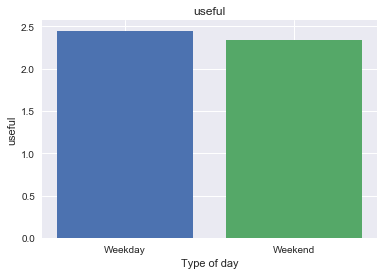

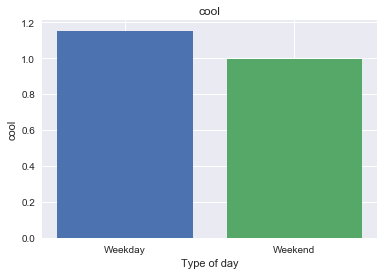

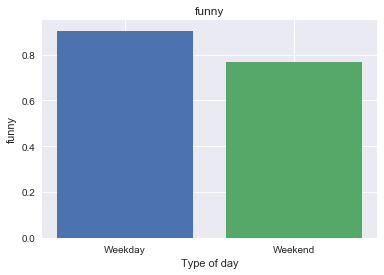

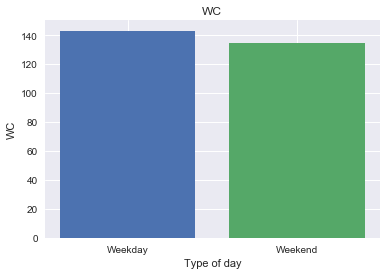

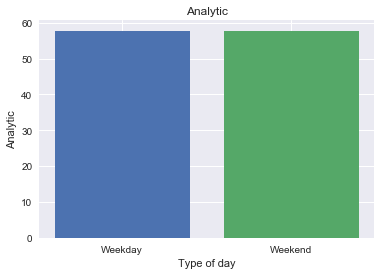

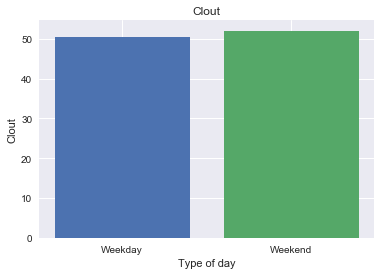

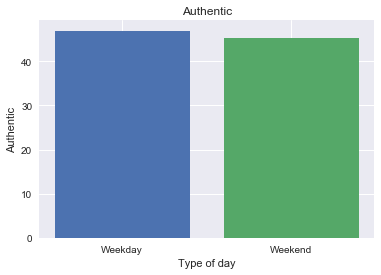

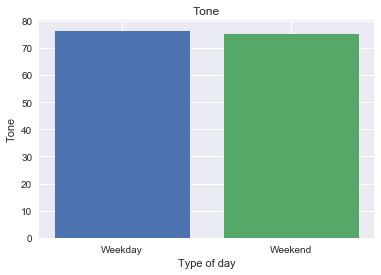

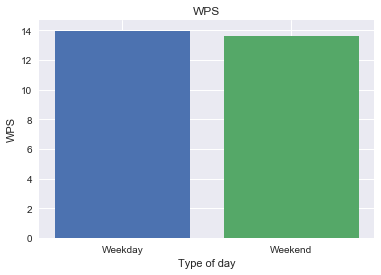

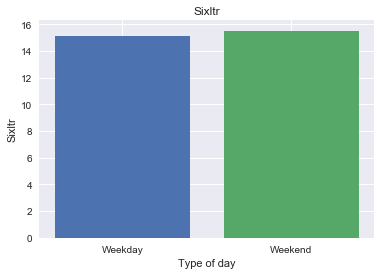

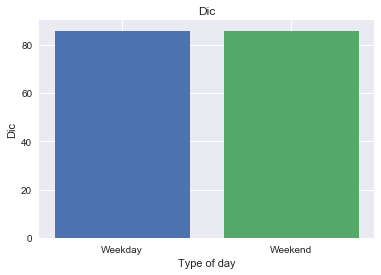

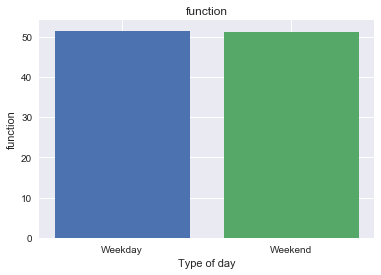

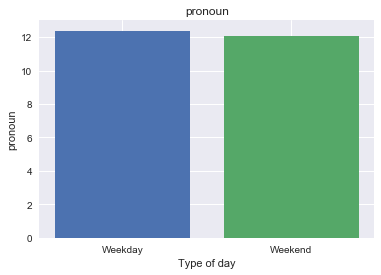

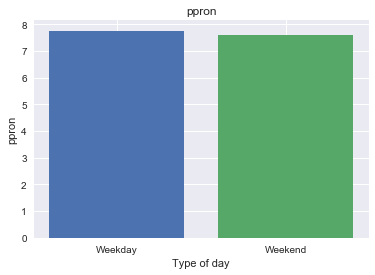

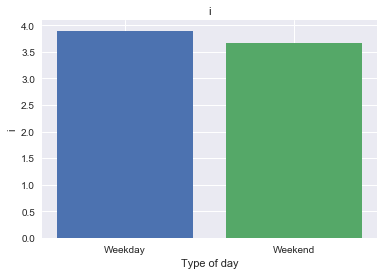

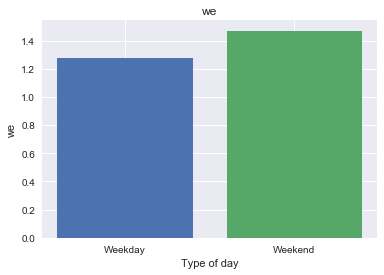

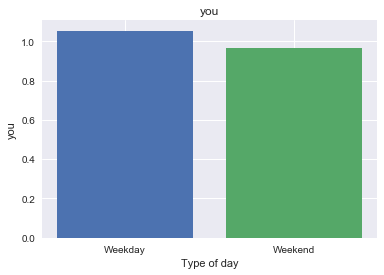

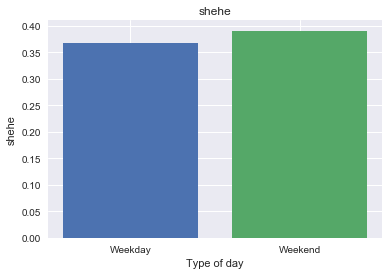

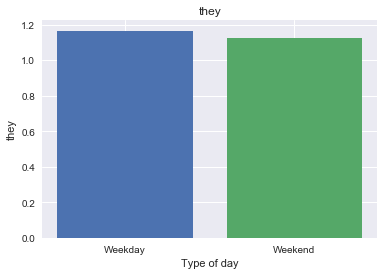

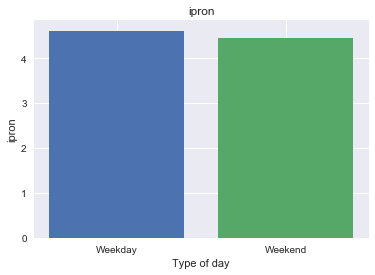

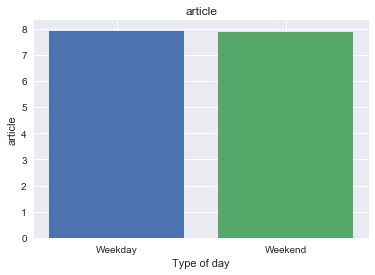

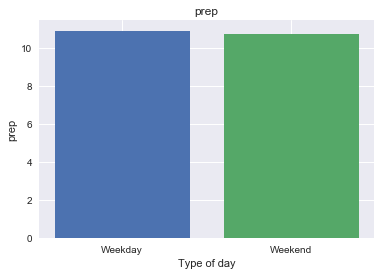

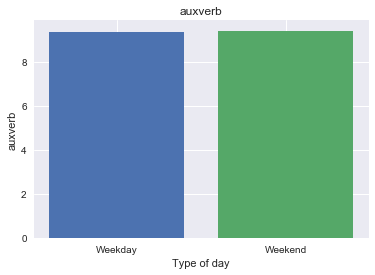

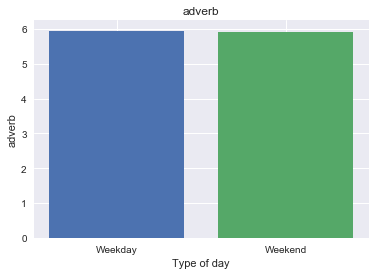

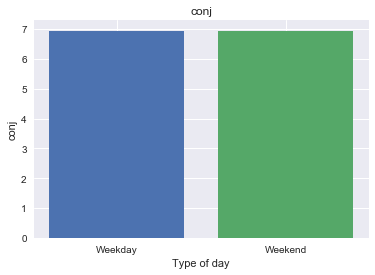

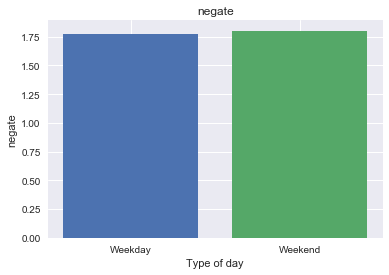

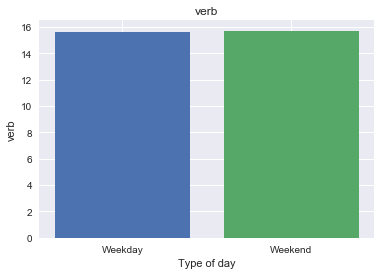

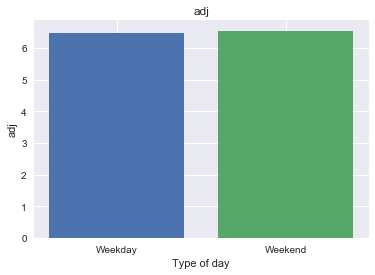

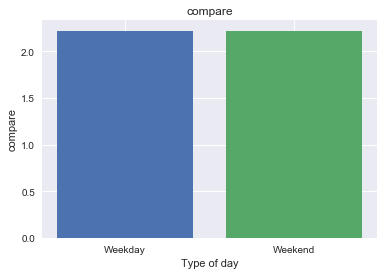

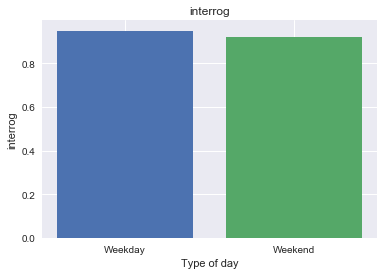

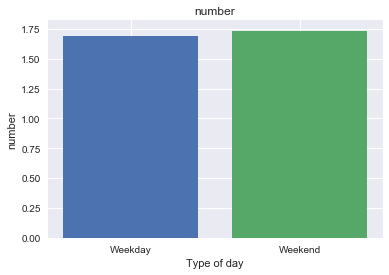

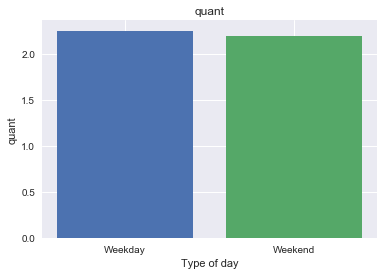

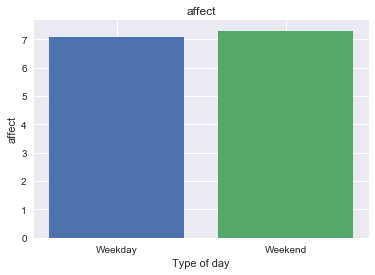

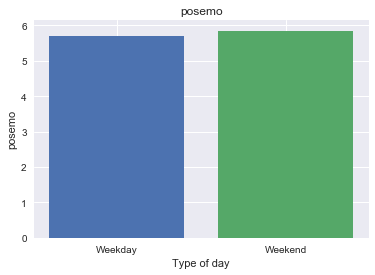

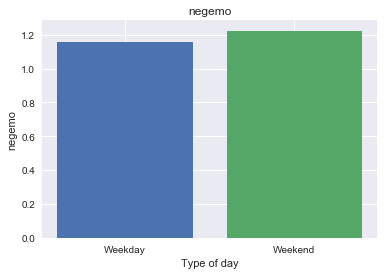

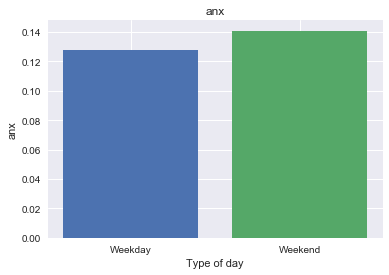

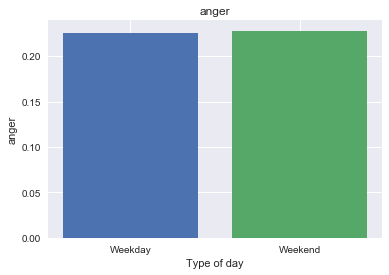

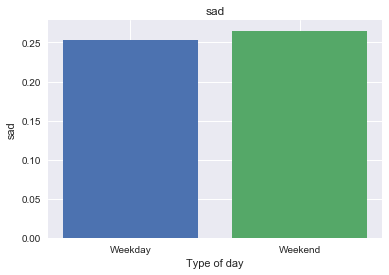

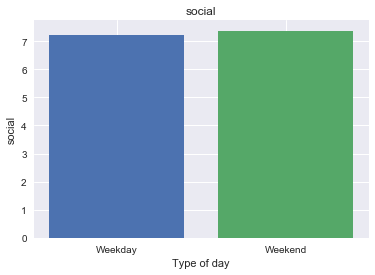

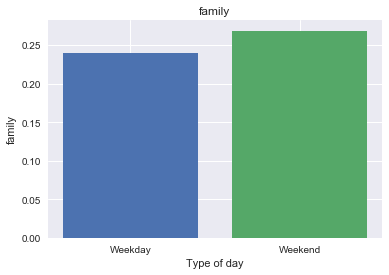

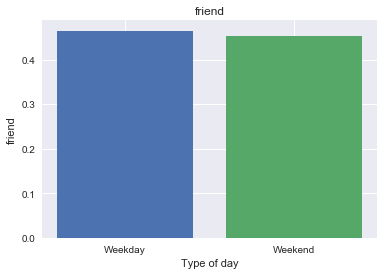

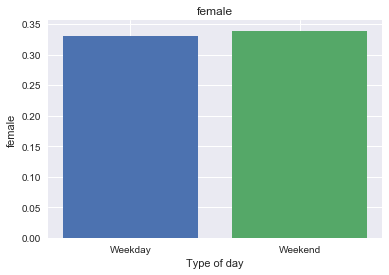

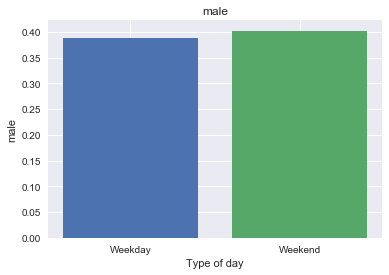

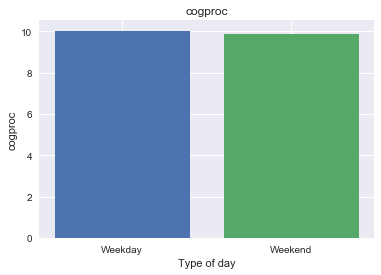

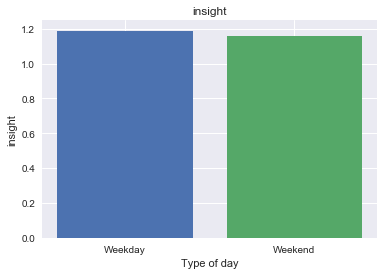

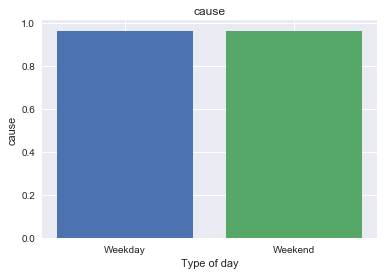

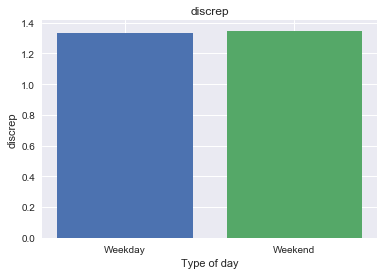

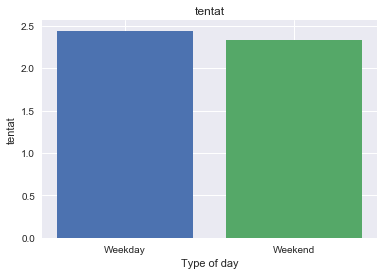

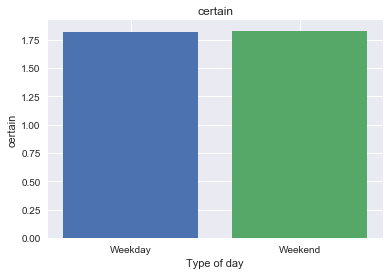

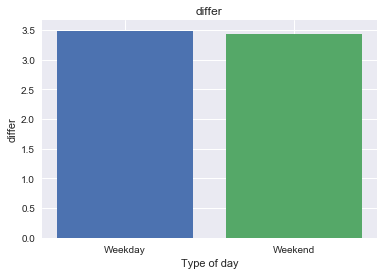

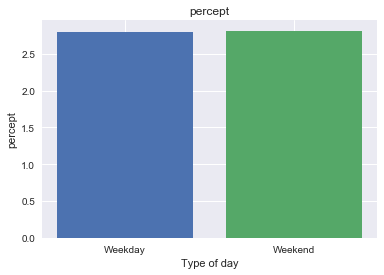

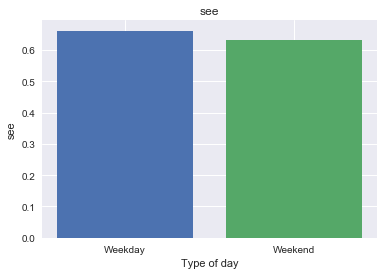

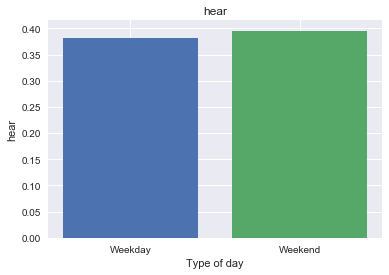

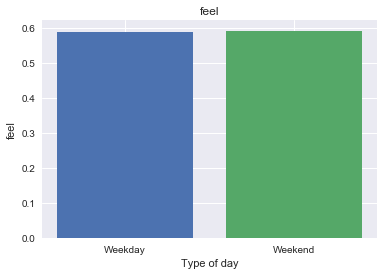

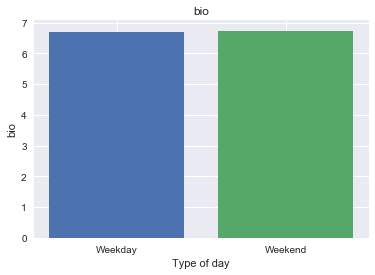

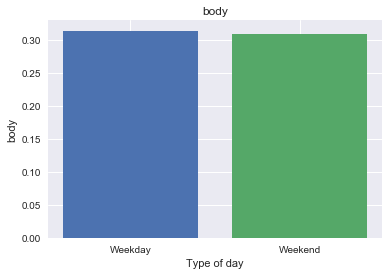

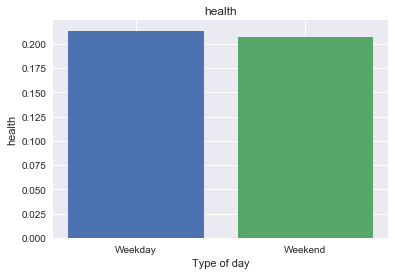

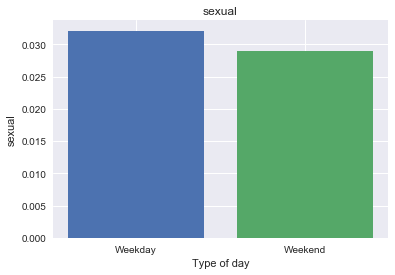

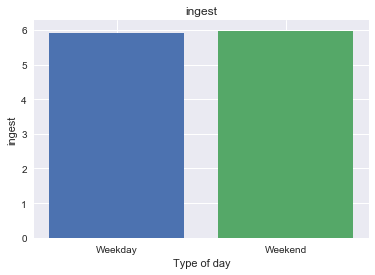

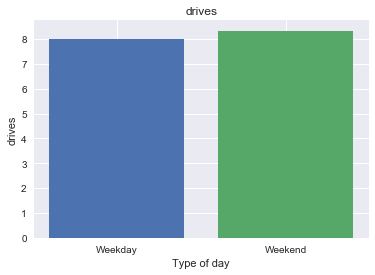

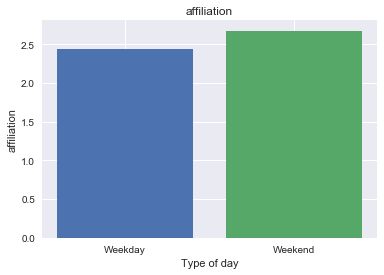

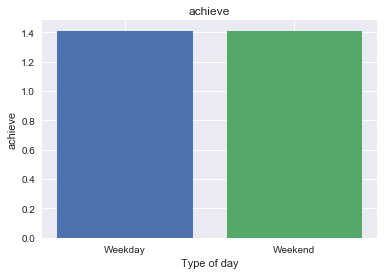

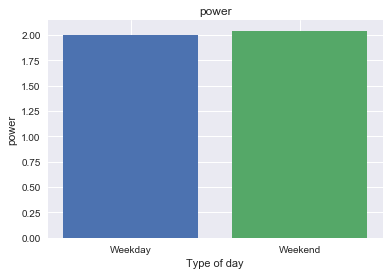

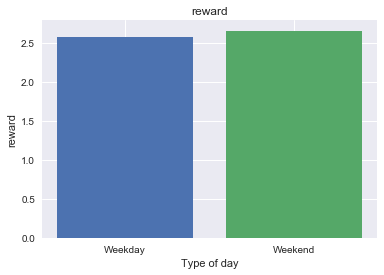

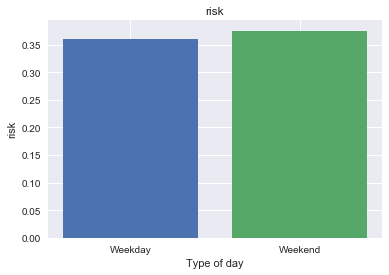

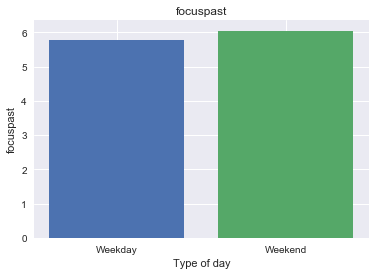

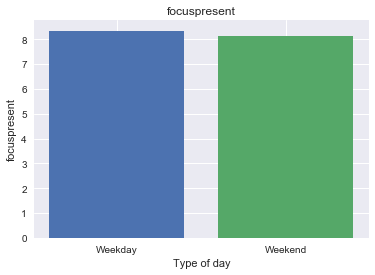

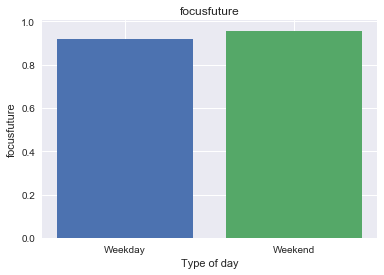

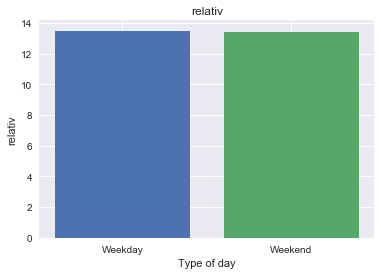

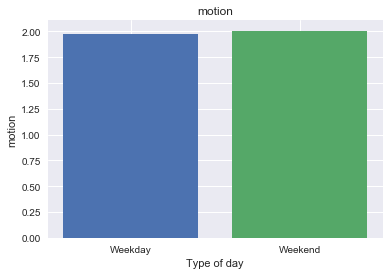

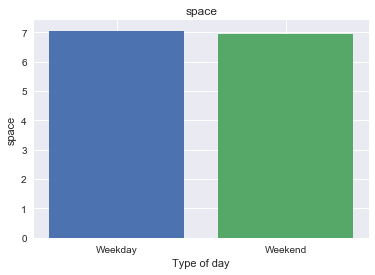

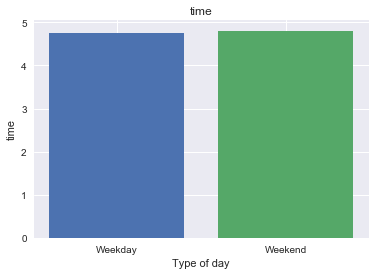

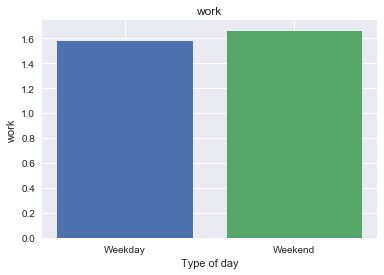

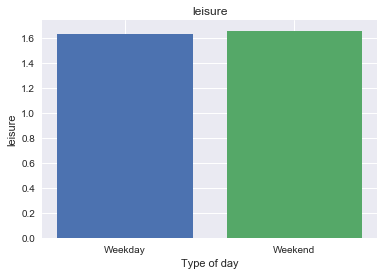

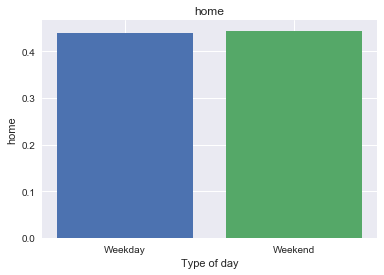

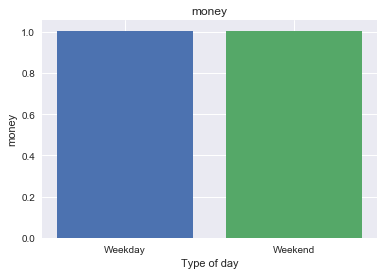

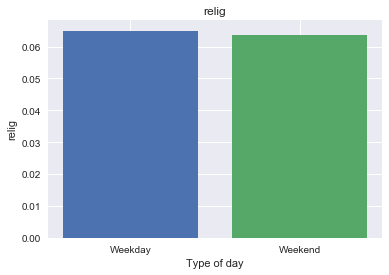

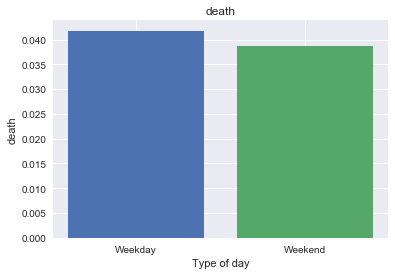

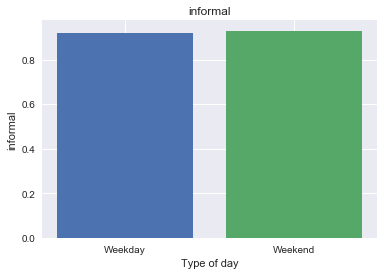

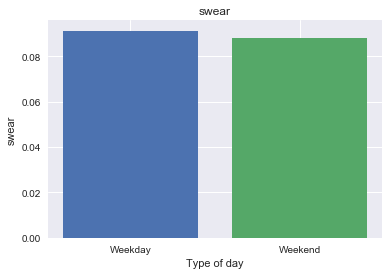

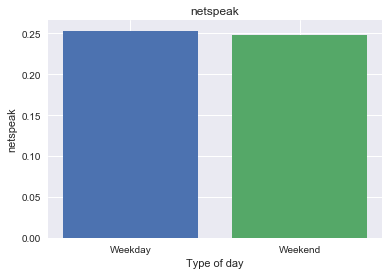

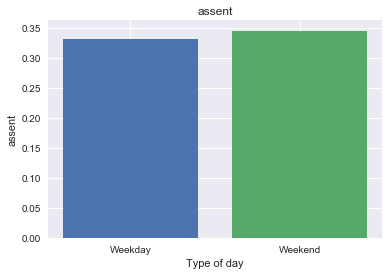

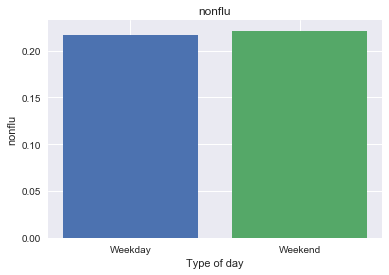

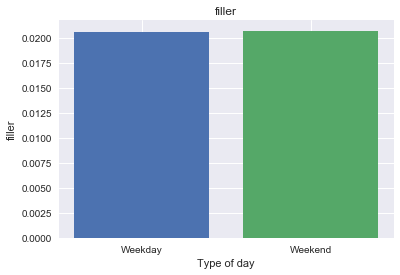

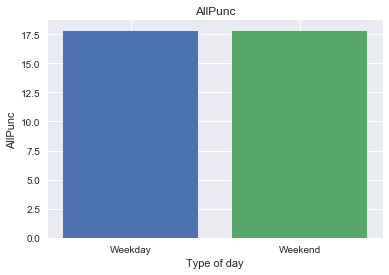

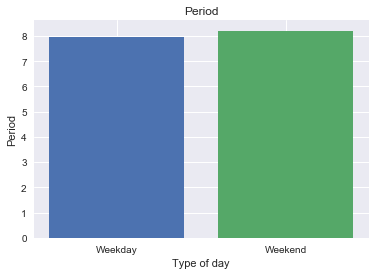

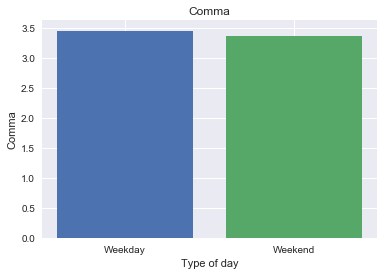

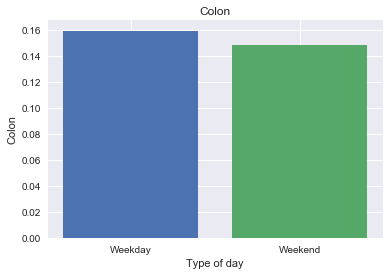

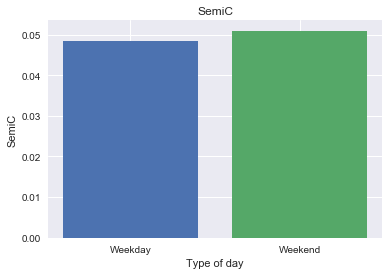

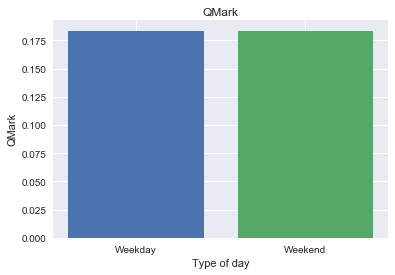

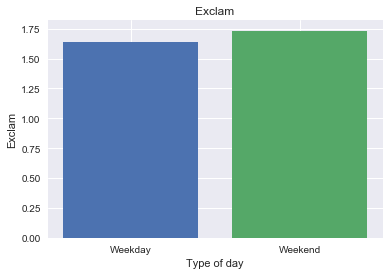

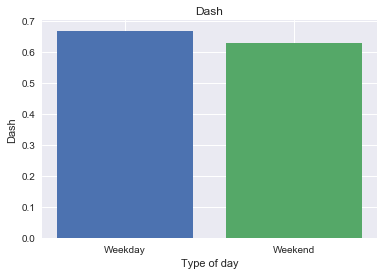

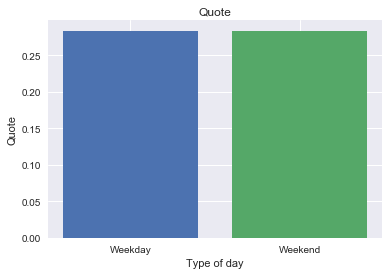

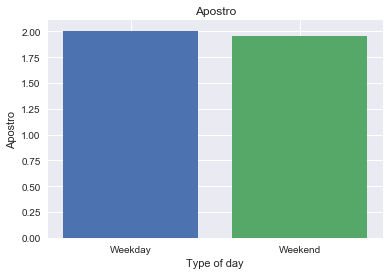

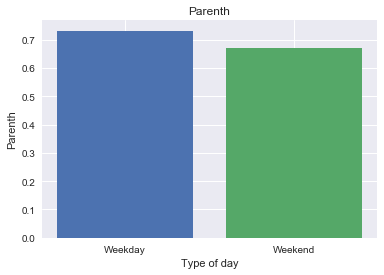

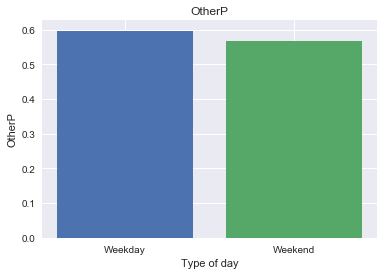

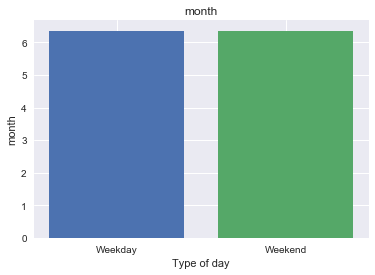

In [23]:
df2_end = df2[df2["weekday_end"] == "weekend"]

summary_end = pd.DataFrame(["Mean"])
for columns in df2_day.columns:
     if pd.api.types.is_numeric_dtype(df2_day[columns]):
        summary_end[columns] = pd.Series([df2_end[columns].mean()])

for column_index in range(0,len(summary_end.columns)):
    if (column_index == 0) or (column_index == 98) or (column_index == 99) or (column_index == 100) :
        pass
    else:
        plt.bar("Weekday", summary_day.iloc[0,column_index])
        plt.bar("Weekend", summary_end.iloc[0,column_index])

        plt.title(summary_end.columns[column_index])
        plt.ylabel(summary_end.columns[column_index])
        plt.xlabel("Type of day")
        
        if (summary_end.columns[column_index] == "family") or (summary_end.columns[column_index] == "i"):
            plt.savefig(str(summary_end.columns[column_index])+".png", dpi = 800)
        
        plt.show()

In [17]:
print(summary_end)

      0    useful      cool     funny          WC   Analytic      Clout  \
0  Mean  2.335199  0.996269  0.768734  134.283271  57.750966  52.065158   

   Authentic       Tone        WPS  ...     QMark    Exclam      Dash  \
0  45.194355  75.293602  13.632627  ...  0.183162  1.733615  0.630592   

      Quote   Apostro   Parenth    OtherP     month         year       hour  
0  0.283519  1.951248  0.668941  0.566965  6.339475  2014.718828  12.133396  

[1 rows x 100 columns]


# Looking for examples

In [18]:
end = df2[df2.weekday_end== "weekend"]  

In [19]:
end[end.family > 7 ]["text"].iloc[0]

"Pretty cool place. My 3 yr old son loves it. Price is very good (no charge for parents, even though you're allowed on the equipment too). Overall, great."

In [20]:
end[end.family > 7 ]["family"].iloc[0]

7.14

In [21]:
end[end.family > 7 ]["i"].iloc[0]

3.57

In [34]:
day = df2[df2.weekday_end== "weekday"]  

In [43]:
day_s = day[day.family < 2 ]

day_s = day[day.useful == 30]

In [45]:
day_s["text"].iloc[0]

"Norman Bates: We all go a little mad sometimes. Haven't you?\nMarion Crane: Yes. Sometimes just one time can be enough.\n\nOh the insanity! But one time is not enough for MAD Greens!\n\nM.Greens features salads with fun names like Doc Holliday, Edgar Allen Poe, and Don Quixote. Just to name a few. The salads are full of BIG flavor and mouthwatering fresh ingredients. \n\nI've also had a lot of success building my own salad. You select your lettuce (choose up to 3 between options romaine, mixed greens, spinach, and kale), your protein (meat and vegetarian options too), up to 4 other ingredients (cheeses, nuts, fruits, and veggies) and your dressing (20+ options). If salads aren't really your thing then you are in the wrong place. Jk. They also have wraps, pannis, juices, soups, hummus AND dessert (Salted Caramel Cookie and 7 Layer Bar!!)!\n\nMy only small bump was that the staff seemed a little confused. One employee didn't know the difference between the roasted red peppers and sun-dr

In [49]:
day_s["i"].iloc[2]

3.85